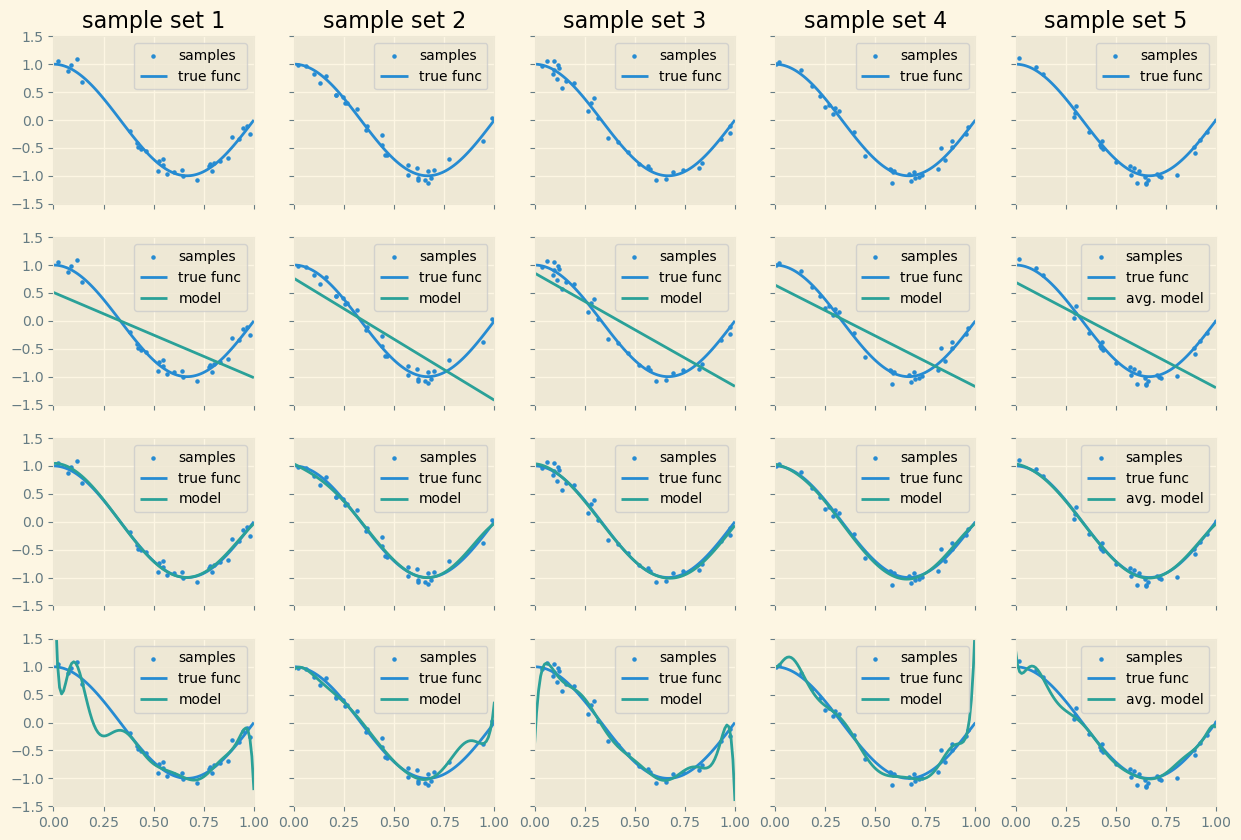

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error


def true_fun(X):
    return np.cos(1.5 * np.pi * X)


np.random.seed(0)

trial, n_samples = 5, 30
degrees = [1, 5, 11]
X = np.random.rand(trial, n_samples)
Y = true_fun(X) + np.random.randn(trial, n_samples) * 0.1
X_plot = np.linspace(0, 1, 100)

with plt.style.context('Solarize_Light2'):
    fig, ax = plt.subplots(len(degrees) + 1, trial, sharex=True, sharey=True, figsize=(15, 10))
    plt.setp(ax, xlim=(0, 1), ylim=(-1.5, 1.5))

    for t in range(trial):
        x, y = X[t, :], Y[t, :]
        for i in range(len(degrees) + 1):
            ax[i, t].scatter(x, y, s=5, label="samples")
            ax[i, t].plot(X_plot, true_fun(X_plot), label="true func")
            if i == 0:
                ax[i, t].set_title("sample set %d" % (t + 1))

    for i in range(len(degrees)):
        polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=True)
        xx_plot = polynomial_features.fit_transform(X_plot[:, np.newaxis])

        lr = [LinearRegression(), LinearRegression(), LinearRegression(), LinearRegression()]
        aver_pre = np.zeros(100)
        for t in range(trial - 1):
            x, y = X[t, :], Y[t, :]
            xx = polynomial_features.fit_transform(x[:, np.newaxis])
            lr[t].fit(xx, y)
            ax[i + 1, t].plot(X_plot, lr[t].predict(xx_plot), label="model")
            aver_pre += lr[t].predict(xx_plot)

        ax[i + 1, -1].plot(X_plot, aver_pre / 4, label="avg. model")

    for t in range(trial):
        for i in range(len(degrees) + 1):
            ax[i, t].legend(loc="best")

    fig.savefig("bias-var-dec.svg")
    plt.show()